<a href="https://colab.research.google.com/github/srilav/neuralnetwork/blob/main/M4_MP5_NB_Stock_Trading_using_DRL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini Project: Stock Trading using DRL

## Learning Objectives

At the end of the experiment, you will be able to

* perform stock trading using Deep Reinforcement Learning
* build an environment for agent and perform stock trading
* experiment with SAC model and improve the reward
* create a dashboard for stock trading using `jupyter-dash`

## Information

Deep reinforcement learning combines artificial neural networks with a framework of reinforcement learning that helps software agents learn how to reach their goals. That is, it unites function approximation and target optimization, mapping states and actions to the rewards they lead to.

Reinforcement learning refers to goal-oriented algorithms, which learn how to achieve a complex objective (goal) or how to maximize along a particular dimension over many steps; for example, they can maximize the points won in a game over many moves. Reinforcement learning algorithms can start from a blank slate, and under the right conditions, achieve superhuman performance. Like a pet incentivized by scolding and treats, these algorithms are penalized when they make the wrong decisions and rewarded when they make the right ones – this is reinforcement.

![img](https://miro.medium.com/max/974/0*NgZ_bq_nUOq73jK_.png)

**SAC:** Soft Actor Critic is defined for RL tasks involving continuous actions. The biggest feature of SAC is that it uses a modified RL objective function. Instead of only seeking to maximize the lifetime rewards, SAC seeks to also maximize the entropy of the policy. The term ‘entropy’ has a rather esoteric definition and many interpretations depending on the application

![img](https://miro.medium.com/max/353/0*5Y3SzMyOQZBRUhrh.png)

Fig: Actor-Critic architecture. Source: Medium

Learning of the actor is based policy gradient approach and critic is learned in value-based fashion. In SAC, there are three networks: the first network represents state-value(V) parameterised by ψ, the second one is a policy function that parameterised by ϕ, and the last one represents soft q function parameterised by θ.

Read More about SAC [here](https://arxiv.org/abs/1801.01290)

## Dataset

### Dataset Description

The Dataset chosen for this mini project is NIFTY50 Stock tradings. The data is the price history and trading volumes of the fifty stocks in the index NIFTY 50 from NSE (National Stock Exchange) India. All stocks are at a day-level with pricing and trading values split across. The NIFTY 50 is a diversified 50 stock index accounting for 13 sectors of the economy.

See the stock indexes of NIFTY 50 in the following [link](https://www1.nseindia.com/products/content/equities/indices/nifty_50.htm)

**Note:** Choose the NIFTY 50 ticker symbols and download the stock data from '2009-01-01' to '2021-09-01' using YahooDownloader

## Grading = 10 Points

In [9]:
#@title Install FinRL, other necessary libraries and extensions
!pip -qq install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

!pip install -q jupyter-dash==0.3.0rc1 dash-bootstrap-components

!pip install pyyaml==5.4.1

!pip install macrodemos --upgrade
!pip install -q dash==2.0.0

     |████████████████████████████████| 234 kB 17.2 MB/s 
     |████████████████████████████████| 177 kB 72.4 MB/s 
     |████████████████████████████████| 53.2 MB 250 kB/s 
     |████████████████████████████████| 1.2 MB 40.2 MB/s 
     |████████████████████████████████| 125 kB 77.0 MB/s 
     |████████████████████████████████| 150 kB 61.8 MB/s 
     |████████████████████████████████| 2.6 MB 55.6 MB/s 
     |████████████████████████████████| 153 kB 68.5 MB/s 
     |████████████████████████████████| 952 kB 63.1 MB/s 
     |████████████████████████████████| 197 kB 76.8 MB/s 
     |████████████████████████████████| 91.7 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 72.5 MB/s 
     |████████████████████████████████| 52 kB 2.0 MB/s 
     |████████████████████████████████| 2.6 MB 53.8 MB/s 
     |████████████████████████████████| 2.6 MB 50.5 MB/s 
     |████████████████████████████████| 2.6 MB 57.3 MB/s 
     |████████████████████████████████| 2.6 MB 64.3 MB/s 
     |██████████

In [7]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/nifty50list.csv

!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/df_account_value.csv

### Import required packages

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')
import warnings
warnings.filterwarnings("ignore")
import datetime
import os
from finrl import config
from finrl.finrl_meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.finrl_meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.finrl_meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
import sys
sys.path.append("../FinRL-Library")

### Data Loading (1 point)

* Read the ticker symbols of Nifty 50 and add `.NS` extension

* Using the symbols download the stock prices data using YahooDownloader

Hint: [YahooDownloader](https://gist.githubusercontent.com/BruceYanghy/6c37022257cfe765d551c1b173570bd4/raw/b2c69214c6316ff8fa46d9b14d437ec6a1edeef2/DownloadData.py)

In [36]:
path = "/content/nifty50list.csv"
# YOUR CODE HERE

In [37]:
NIFTY_50_TICKER = pd.read_csv(path)

In [38]:
NIFTY_50_TICKER.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,ACC Ltd.,CEMENT & CEMENT PRODUCTS,ACC,EQ,INE012A01025
1,Abbott India Ltd.,PHARMA,ABBOTINDIA,EQ,INE358A01014
2,Adani Enterprises Ltd.,METALS,ADANIENT,EQ,INE423A01024
3,Adani Green Energy Ltd.,POWER,ADANIGREEN,EQ,INE364U01010
4,Adani Transmission Ltd.,POWER,ADANITRANS,EQ,INE931S01010


In [39]:
NIFTY_50_TICKER.Symbol

0            ACC
1     ABBOTINDIA
2       ADANIENT
3     ADANIGREEN
4     ADANITRANS
5          ALKEM
6      AMBUJACEM
7     APOLLOHOSP
8     AUROPHARMA
9          DMART
10    BAJAJHLDNG
11    BANDHANBNK
12    BERGEPAINT
13        BIOCON
14      BOSCHLTD
15      CADILAHC
16        COLPAL
17           DLF
18         DABUR
19          GAIL
20         GLAND
21      GODREJCP
22       HDFCAMC
23       HAVELLS
24     HINDPETRO
25       ICICIGI
26    ICICIPRULI
27           IGL
28    INDUSTOWER
29        NAUKRI
30        INDIGO
31      JUBLFOOD
32           LTI
33         LUPIN
34           MRF
35        MARICO
36    MUTHOOTFIN
37          NMDC
38      PETRONET
39    PIDILITIND
40           PEL
41          PGHH
42           PNB
43       SBICARD
44       SIEMENS
45    TORNTPHARM
46           UBL
47    MCDOWELL-N
48          VEDL
49       YESBANK
Name: Symbol, dtype: object

In [103]:
""" Download and save the data in a pandas DataFrame """

start_date = '2009-01-01'
end_date = '2021-09-01'
# Download and save the data in a pandas DataFrame:

df = YahooDownloader(start_date,
                     end_date,
                     ticker_list = NIFTY_50_TICKER.Symbol+'.NS').fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [106]:
df['tic'].unique()

array(['ABBOTINDIA.NS', 'ACC.NS', 'ADANIENT.NS', 'AMBUJACEM.NS',
       'APOLLOHOSP.NS', 'AUROPHARMA.NS', 'BAJAJHLDNG.NS', 'BERGEPAINT.NS',
       'BIOCON.NS', 'BOSCHLTD.NS', 'CADILAHC.NS', 'COLPAL.NS', 'DABUR.NS',
       'DLF.NS', 'GAIL.NS', 'GODREJCP.NS', 'HAVELLS.NS', 'HINDPETRO.NS',
       'IGL.NS', 'LUPIN.NS', 'MARICO.NS', 'MCDOWELL-N.NS', 'MRF.NS',
       'NAUKRI.NS', 'NMDC.NS', 'PEL.NS', 'PETRONET.NS', 'PGHH.NS',
       'PIDILITIND.NS', 'PNB.NS', 'SIEMENS.NS', 'TORNTPHARM.NS', 'UBL.NS',
       'VEDL.NS', 'YESBANK.NS', 'JUBLFOOD.NS', 'MUTHOOTFIN.NS',
       'INDUSTOWER.NS', 'ADANITRANS.NS', 'INDIGO.NS', 'ALKEM.NS',
       'LTI.NS', 'ICICIPRULI.NS', 'DMART.NS', 'ICICIGI.NS',
       'BANDHANBNK.NS', 'ADANIGREEN.NS', 'HDFCAMC.NS', 'SBICARD.NS',
       'GLAND.NS'], dtype=object)

In [44]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2009-01-02,20.570000,20.760000,19.520000,11.407829,763300.0,ACC,4
1,2009-01-02,20.480000,20.980000,20.299999,20.740000,888830.0,IGL,4
2,2009-01-02,104.230003,108.129997,104.230003,106.400002,2973855.0,PNB,4
3,2009-01-02,31.881800,33.472698,30.290899,31.590900,11970970.0,UBL,4
4,2009-01-05,19.770000,19.770000,18.660000,11.186767,1191100.0,ACC,0


### Preprocess Data (1 point)

FinRL uses a `FeatureEngineer` class to preprocess data. Some of the technical indicators to be used in the analysis of financial markets includes.

1. `relative strength index` (RSI): it represents the size of recent gains and losses, during a specified time period.
2. `moving average convergence divergence` (MACD):  it is an indicator to determine price momentum and short term trend.
3. `commodity channel index` (CCI): its an indicator helps in identifying cyclical trends.
4. `directional index` (DX): it represents group of directional movements that form trading system

* Configure the technical indicators and apply feature engineering

  Hint: `FeatureEngineer()`

In [107]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

In [96]:
df['date']

0       2009-01-02
1       2009-01-02
2       2009-01-02
3       2009-01-02
4       2009-01-05
           ...    
12646   2021-08-25
12647   2021-08-26
12648   2021-08-27
12649   2021-08-30
12650   2021-08-31
Name: date, Length: 12651, dtype: datetime64[ns]

In [46]:
df.sort_values(['date','tic'],ignore_index=True).head()

,date,open,high,low,close,volume,tic,day
0,2009-01-02,20.570000,20.760000,19.520000,11.407829,763300.0,ACC,4
1,2009-01-02,20.480000,20.980000,20.299999,20.740000,888830.0,IGL,4
2,2009-01-02,104.230003,108.129997,104.230003,106.400002,2973855.0,PNB,4
3,2009-01-02,31.881800,33.472698,30.290899,31.590900,11970970.0,UBL,4
4,2009-01-05,19.770000,19.770000,18.660000,11.186767,1191100.0,ACC,0


In [108]:
tech_indicator_list = config.INDICATORS
print(tech_indicator_list)

['macd', 'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30', 'close_30_sma', 'close_60_sma']


In [109]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = tech_indicator_list,
                    use_turbulence=False,
                    user_defined_feature = False)

df = fe.preprocess_data(df)
df.head()

Successfully added technical indicators


,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2009-01-02,280.100006,280.100006,280.100006,236.199600,0,ABBOTINDIA.NS,4,0.0,236.1996,236.1996,100.0,66.666667,100.0,236.199600,236.199600
3120,2009-01-02,503.899994,503.899994,484.000000,375.425476,515098,ACC.NS,4,0.0,236.1996,236.1996,100.0,66.666667,100.0,375.425476,375.425476
6240,2009-01-02,24.524010,25.206083,23.987547,19.948492,527417,ADANIENT.NS,4,0.0,236.1996,236.1996,100.0,66.666667,100.0,19.948492,19.948492
9360,2009-01-02,71.750000,72.000000,67.849998,51.071278,2316342,AMBUJACEM.NS,4,0.0,236.1996,236.1996,100.0,66.666667,100.0,51.071278,51.071278
12480,2009-01-02,223.500000,244.875000,219.500000,223.279022,117614,APOLLOHOSP.NS,4,0.0,236.1996,236.1996,100.0,66.666667,100.0,223.279022,223.279022


In [19]:
""" Perform Feature Engineering """
df1 = FeatureEngineer(use_technical_indicator=True, use_turbulence=False).preprocess_data(df.copy())


# add covariance matrix as states
df1=df1.sort_values(['date','tic'],ignore_index=True)
df1.index = df1.date.factorize()[0]

cov_list = []
# look back is one year
lookback=252
for i in range(lookback,len(df1.index.unique())):
  data_lookback = df1.loc[i-lookback:i,:]
  price_lookback=data_lookback.pivot_table(index = 'date',columns = 'tic', values = 'close')
  return_lookback = price_lookback.pct_change().dropna()
  covs = return_lookback.cov().values 
  cov_list.append(covs)
  
df_cov = pd.DataFrame({'date':df1.date.unique()[lookback:],'cov_list':cov_list})
df1 = df1.merge(df_cov, on='date')
df1 = df1.sort_values(['date','tic']).reset_index(drop=True)
df1.head()

Successfully added technical indicators


,date,open,high,low,close,volume,tic,day,macd_x,boll_ub_x,...,close_60_sma_x,macd_y,boll_ub_y,boll_lb_y,rsi_30_y,cci_30_y,dx_30_y,close_30_sma_y,close_60_sma_y,cov_list
0,2010-01-04,28.389999,28.770000,27.100000,16.887300,628900.0,ACC,0,0.194004,17.939630,...,16.667816,0.194004,17.939630,16.249296,51.571450,37.393231,3.214785,16.939092,16.667816,[[0.0015858913866775627]]
1,2010-01-05,27.360001,27.440001,26.760000,16.616018,861400.0,ACC,1,0.128162,17.948086,...,16.676236,0.128162,17.948086,16.220493,49.640892,-47.587493,4.697722,16.929433,16.676236,[[0.0015853615458983003]]
2,2010-01-06,26.930000,27.090000,26.150000,16.307745,1621800.0,ACC,2,0.050525,17.949780,...,16.672719,0.050525,17.949780,16.217567,47.548476,-96.729031,16.913411,16.911758,16.672719,[[0.001568919272817783]]
3,2010-01-07,26.469999,26.950001,26.299999,16.579027,476400.0,ACC,3,0.010763,17.930759,...,16.671592,0.010763,17.930759,16.255701,49.486781,-78.901944,16.913411,16.900866,16.671592,[[0.0015693423532619467]]
4,2010-01-08,26.730000,26.820000,26.360001,16.424892,253500.0,ACC,4,-0.032808,17.935576,...,16.673681,-0.032808,17.935576,16.246568,48.434761,-85.173798,16.913411,16.899428,16.673681,[[0.0015692180680644376]]


### Exploratory Data Analysis (2 points)

#### Describe the statistics of the data

In [49]:
# YOUR CODE HERE
df.describe()

,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
count,3188.000000,3188.000000,3188.000000,3188.000000,3.188000e+03,3188.000000,3188.000000,3188.000000,3188.000000,3188.000000,3188.000000,3188.000000,3188.000000,3188.000000
mean,39.330910,39.731521,38.908927,30.548541,8.418152e+05,2.020389,0.079990,31.888002,28.988305,52.178383,19.345457,20.881809,30.381112,30.210591
std,7.717140,7.670413,7.755864,8.700003,6.214946e+05,1.399457,0.508161,8.932952,8.555004,7.302308,106.958763,15.105965,8.636274,8.592392
min,15.350000,15.800000,14.880000,9.231624,1.569000e+05,0.000000,-5.696889,11.609928,8.551716,0.000000,-487.318064,0.003484,10.427222,11.141722
25%,34.664999,35.047500,34.270000,24.989761,5.302750e+05,1.000000,-0.124221,26.561745,23.301826,47.972581,-61.587731,8.495936,24.933388,24.845098
50%,40.570002,40.990000,40.164999,30.886540,7.126000e+05,2.000000,0.127610,32.448036,29.475867,52.978193,29.569434,18.510438,30.925210,30.929570
75%,45.642500,46.049999,45.262499,37.546361,9.699000e+05,3.000000,0.329439,39.382127,35.768377,57.095286,101.634828,30.341443,37.518493,37.477770
max,54.439999,54.560001,53.869999,50.125771,1.485900e+07,4.000000,1.976076,52.114729,47.560907,78.484770,389.630976,100.000000,48.420224,47.863314


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3188 entries, 0 to 3187
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          3188 non-null   datetime64[ns]
 1   open          3188 non-null   float64       
 2   high          3188 non-null   float64       
 3   low           3188 non-null   float64       
 4   close         3188 non-null   float64       
 5   volume        3188 non-null   float64       
 6   tic           3188 non-null   object        
 7   day           3188 non-null   int64         
 8   macd          3188 non-null   float64       
 9   boll_ub       3188 non-null   float64       
 10  boll_lb       3188 non-null   float64       
 11  rsi_30        3188 non-null   float64       
 12  cci_30        3188 non-null   float64       
 13  dx_30         3188 non-null   float64       
 14  close_30_sma  3188 non-null   float64       
 15  close_60_sma  3188 non-null   float64 

In [51]:
df.isna().sum()

date            0
open            0
high            0
low             0
close           0
volume          0
tic             0
day             0
macd            0
boll_ub         0
boll_lb         0
rsi_30          0
cci_30          0
dx_30           0
close_30_sma    0
close_60_sma    0
dtype: int64

#### Find how many times did the stock prices end lower than their opening prices in 2019 vs in 2020?

**Hint:** Open - Close per day

In [98]:
df.head()

,date,open,high,low,close,volume,tic,day,Day_Change
0,2009-01-02,20.570000,20.760000,19.520000,11.407830,763300.0,ACC,4,True
1,2009-01-02,20.480000,20.980000,20.299999,20.740000,888830.0,IGL,4,False
2,2009-01-02,104.230003,108.129997,104.230003,106.400002,2973855.0,PNB,4,False
3,2009-01-02,31.881800,33.472698,30.290899,31.590900,11970970.0,UBL,4,True
4,2009-01-05,19.770000,19.770000,18.660000,11.186767,1191100.0,ACC,0,True


In [101]:
df['Day_Change'] = (df['open']-df['close']>0)
import datetime as dt
mask_2019 = df['date'].dt.year == int(2019) 
mask_2020 =  df['date'].dt.year == int(2020)
new_df_2019 = df.loc[mask_2019, ['tic','date','Day_Change']]
new_df_2020 = df.loc[mask_2020, ['tic','date','Day_Change']]
new_df = pd.concat([new_df_2019,new_df_2020])
new_df = pd.DataFrame(new_df.groupby('tic')['Day_Change'].count()).reset_index()
new_df.head()

,tic,Day_Change
0,ACC,505
1,MRF,1
2,PNB,108


#### Find the stock that shows the highest increase in stock price per day, over the entire time period

In [137]:
df['Day_Change'] = (df['open']-df['close'])

import datetime as dt
new_df = pd.DataFrame(new_df.groupby('tic')['Day_Change'].sum()).reset_index()
new_df.head()

,tic,Day_Change
0,ACC,505
1,MRF,1
2,PNB,108


In [2]:
# imports
!pip install yfinance
import yfinance as yf
from pandas_datareader import data as pdr
import pandas as pd

     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 6.4 MB 35.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


#### Find the loss percentage of each stock considering open and closing prices of each day

**Hint:** `sum(open - close) / len(instances)`

In [ ]:
df['Day_Perc_Change'] = ((df['close']-df['open'])/df['open']) *100
df.head()

,date,open,high,low,close,volume,tic,day,Day_Perc_Change
0,2009-01-02,20.570000,20.760000,19.520000,11.407827,763300.0,ACC,4,-44.541431
1,2009-01-02,20.480000,20.980000,20.299999,20.740000,888830.0,IGL,4,1.269532
2,2009-01-02,104.230003,108.129997,104.230003,106.400002,2973855.0,PNB,4,2.081932
3,2009-01-02,31.881800,33.472698,30.290899,31.590900,11970970.0,UBL,4,-0.912431
4,2009-01-05,19.770000,19.770000,18.660000,11.186770,1191100.0,ACC,0,-43.415427


#### Find the Top 10 Stocks with high volume

In [110]:
Top10STOCKS = df.groupby('tic').agg({"volume":"sum"}).sort_values('volume', ascending=False).iloc[:10]
print(Top10STOCKS)

                     volume
tic                        
YESBANK.NS     135171744926
PNB.NS          59090841665
VEDL.NS         31912921419
DLF.NS          29694736468
ADANIENT.NS     28894121574
GAIL.NS         24481072156
HINDPETRO.NS    18443527816
BIOCON.NS       13581412877
MCDOWELL-N.NS   11571613695
NMDC.NS         11283049561


#### Plot the closing value of stock with highest volume and returns

In [113]:
yesbank_df = yf.download('YESBANK.NS','2009-01-01','2021-09-01')

[*********************100%***********************]  1 of 1 completed


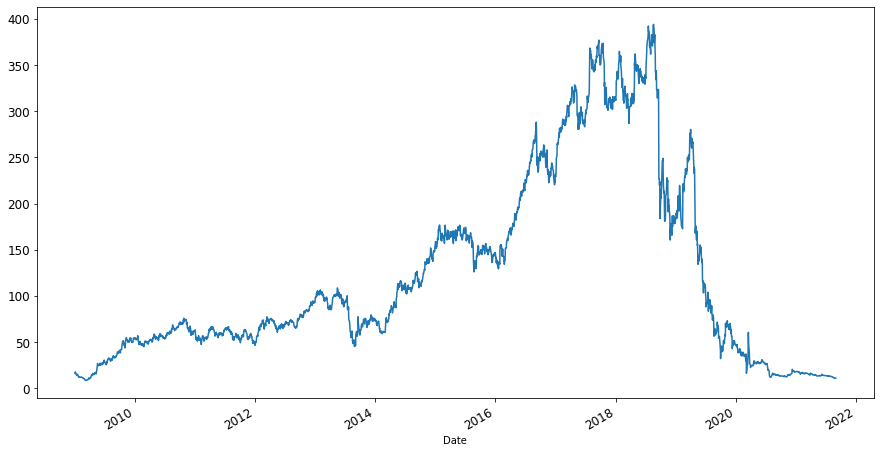

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
yesbank_df['Close'].plot(figsize = (15,8), fontsize = 12)
plt.show()

#### Daily Returns of the stocks

* Apply pct_change() and extract daily returns

* Plot the histogram of daily returns

* Find the stock with maximum daily return

In [116]:
# YOUR CODE HERE
df['Daily Returns'] = df['close'].pct_change()*100
df.dropna(axis = 0, inplace = True)
df.head()

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,Daily Returns
3120,2009-01-02,503.899994,503.899994,484.000000,375.425476,515098,ACC.NS,4,0.0,236.1996,236.1996,100.0,66.666667,100.0,375.425476,375.425476,58.944162
6240,2009-01-02,24.524010,25.206083,23.987547,19.948492,527417,ADANIENT.NS,4,0.0,236.1996,236.1996,100.0,66.666667,100.0,19.948492,19.948492,-94.686431
9360,2009-01-02,71.750000,72.000000,67.849998,51.071278,2316342,AMBUJACEM.NS,4,0.0,236.1996,236.1996,100.0,66.666667,100.0,51.071278,51.071278,156.015730
12480,2009-01-02,223.500000,244.875000,219.500000,223.279022,117614,APOLLOHOSP.NS,4,0.0,236.1996,236.1996,100.0,66.666667,100.0,223.279022,223.279022,337.190986
15600,2009-01-02,17.000000,17.590000,16.750000,15.460908,874800,AUROPHARMA.NS,4,0.0,236.1996,236.1996,100.0,66.666667,100.0,15.460908,15.460908,-93.075521


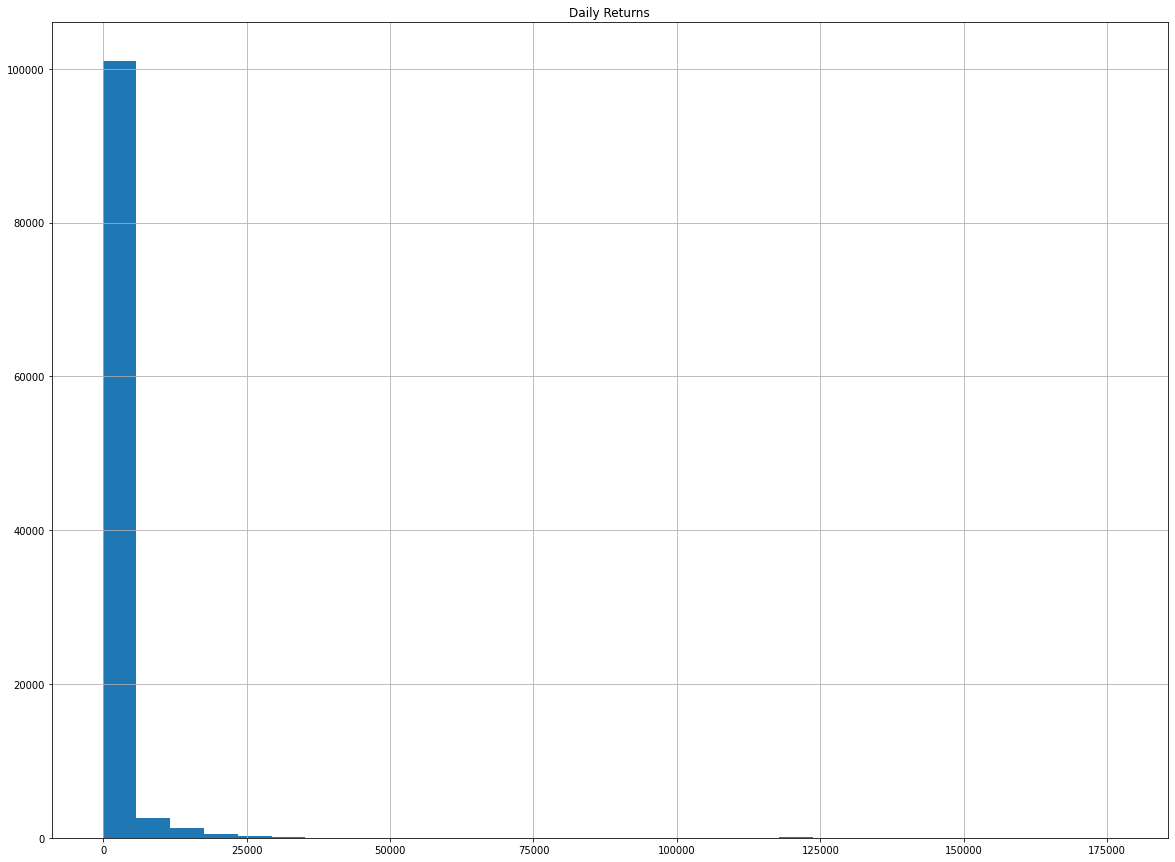

In [117]:
df.hist('Daily Returns',bins=30, figsize=(20,15))
plt.show()

### Train & Trade Data Split

In real life trading, the model needs to be updated periodically using rolling windows. Here, we just slice the data once into train and trade set.

In [118]:
PATH_TO_MODEL_DIR = 'drive/MyDrive/FinRLManystock/'
print(PATH_TO_MODEL_DIR)
import os
if not os.path.exists(PATH_TO_MODEL_DIR +'saved'):
  os.makedirs(PATH_TO_MODEL_DIR+'saved')
if not os.path.exists(PATH_TO_MODEL_DIR + 'trained_model_data'):
  os.makedirs(PATH_TO_MODEL_DIR + 'trained_model_data')
if not os.path.exists(PATH_TO_MODEL_DIR + 'tensor'):
  os.makedirs(PATH_TO_MODEL_DIR + 'tensor')
if not os.path.exists(PATH_TO_MODEL_DIR + 'results'):
  os.makedirs(PATH_TO_MODEL_DIR + 'results')

drive/MyDrive/FinRLManystock/


In [138]:
# Train and trade data
train = data_split(df, start = start_date, end = '2020-01-01')
trade = data_split(df, start = '2020-01-01', end = end_date)
# Check the length of the two datasets
print(len(train))
print(len(trade))

91969
14110


### Build Environment (1 point)


* Define the below kwargs to be used in Stock Trading Environment

  * stock_dim: (int) number of unique stocks
  * hmax : (int) maximum number of shares to trade
  * initial_amount: (int) start money
  * transaction_cost_pct : (float) transaction cost percentage per trade
  * reward_scaling: (float) scaling factor for reward, good for training
  * tech_indicator_list: (list) a list of technical indicator names (modified from config.py)

In [139]:
# Compute State Space and Action Space
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(config.INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 34, State Space: 341


In [140]:
# New
buy_cost_list = [0.001] * stock_dimension
sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

# Initialize an environment class
env_kwargs = {
    "hmax": 100,                                                # max number of share purchases allowed per asset
    "initial_amount": 1000000,                                  # amount of cash initially available
    "buy_cost_pct": buy_cost_list,                              # cost for buying shares
    "sell_cost_pct": sell_cost_list,                            # cost for selling shares
    "state_space": state_space,                                 # contains all of the environment’s data to be observed by the agent
    "stock_dim": stock_dimension,
    "num_stock_shares": num_stock_shares, 
    "tech_indicator_list": config.INDICATORS, 
    "action_space": stock_dimension,                            # contain all of the actions possible for an agent to take in the environment
    "reward_scaling": 1e-4 }                                    # scaling value to multiply reward by at each step

e_train_gym = StockTradingEnv(df = train, **env_kwargs)
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

ValueError: ignored

### Implement DRL Algorithm (2 points)

Use Soft Actor-Critic (SAC) for stock trading, it is one of the most recent state-of-art algorithms. SAC is featured by its stability. 

* Define the SAC parameters and train the SAC model
* Optimize the parameters to improve the reward

In [ ]:
# Train SAC Model
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 200,
    "ent_coef": "auto_0.1"
}
model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=30000)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 200, 'ent_coef': 'auto_0.1'}
Using cuda device
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 50       |
|    time_elapsed    | 241      |
|    total_timesteps | 12080    |
| train/             |          |
|    actor_loss      | 6.25e+03 |
|    critic_loss     | 4.34e+03 |
|    ent_coef        | 0.281    |
|    ent_coef_loss   | 11.8     |
|    learning_rate   | 0.0001   |
|    n_updates       | 11879    |
|    reward          | 0.0      |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 48       |
|    time_elapsed    | 495      |
|    total_timesteps | 24160    |
| train/             |          |
|    actor_loss      | 4.08e+03 |
|    critic_loss     | 8.18e+03 |
|    ent_coef        | 0.942    |
|    ent_coef_lo

#### Optional: Implement other DRL Algorithms

In [ ]:
# Train ddpq Model
agent = DRLAgent(env = env_train)
DDPG_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 200
}
model_ddpg = agent.get_model("ddpg",model_kwargs = DDPG_PARAMS)
trained_sac = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=30000)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 200}
Using cuda device
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 100       |
|    time_elapsed    | 120       |
|    total_timesteps | 12080     |
| train/             |           |
|    actor_loss      | -9.59e+03 |
|    critic_loss     | 1.74e+05  |
|    learning_rate   | 0.0001    |
|    n_updates       | 9060      |
|    reward          | 0.0       |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 88        |
|    time_elapsed    | 273       |
|    total_timesteps | 24160     |
| train/             |           |
|    actor_loss      | -6.33e+03 |
|    critic_loss     | 9.6e+04   |
|    learning_rate   | 0.0001    |
|    n_updates       | 21140     |
|    reward          | 0.0       |
---------------

In [ ]:
# Train ppo Model
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.005,
    "batch_size": 128,
    "learning_rate": 0.0001
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)
trained_sac = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=30000)

{'n_steps': 2048, 'ent_coef': 0.005, 'batch_size': 128, 'learning_rate': 0.0001}
Using cuda device
-------------------------------------
| time/              |              |
|    fps             | 341          |
|    iterations      | 1            |
|    time_elapsed    | 5            |
|    total_timesteps | 2048         |
| train/             |              |
|    reward          | -0.051817454 |
-------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 311          |
|    iterations           | 2            |
|    time_elapsed         | 13           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0024612579 |
|    clip_fraction        | 0.00649      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.42        |
|    explained_variance   | 0            |
|    learning_rate        | 0.0001       |


In [ ]:
# Train A2C Model
agent = DRLAgent(env = env_train)
A2C_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.005,
    "learning_rate": 0.0001
}
model_a2c = agent.get_model("a2c",model_kwargs = A2C_PARAMS)
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=30000)

{'n_steps': 2048, 'ent_coef': 0.005, 'learning_rate': 0.0001}
Using cuda device
day: 3019, episode: 40
begin_total_asset: 1000000.00
end_total_asset: 1189327.09
total_reward: 189327.09
total_cost: 5623.72
total_trades: 2991
Sharpe: 0.203


### Trading (1 point)

* Build the Environment for trading
* Use the trained SAC model to trade

In [102]:
""" Create trading env and make prediction and get the account value change """
# YOUR CODE HERE
# Create trading env
e_trade_gym = StockTradingEnv(df = trade, **env_kwargs)

# Make prediction and get the account value change
df_account_value, df_actions = DRLAgent.DRL_prediction(model = trained_sac, environment = e_trade_gym)

NameError: ignored

In [ ]:
df_account_value.head()

,date,account_value
0,2021-01-04,1.000000e+06
1,2021-01-05,1.000000e+06
2,2021-01-06,1.000036e+06
3,2021-01-07,1.000059e+06
4,2021-01-08,1.000051e+06


### Backtesting Performance (Optional)

Backtesting plays a key role in evaluating the performance of a trading strategy. Backtesting assesses the viability of a trading strategy by discovering how it would perform on historical data. If backtesting works, traders and analysts may have increased confidence to employ it going forward.Automated backtesting tool is preferred because it reduces the human error.

`FinRL` uses a set of functions to do the backtesting with [Quantopian pyfolio](https://github.com/quantopian/pyfolio) package. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

* Perform backtest on the account values and baseline data

In [ ]:
""" BackTest Stats """
perf_stats_all = backtest_stats(account_value = df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

Annual return          0.035896
Cumulative returns     0.023646
Annual volatility      0.020858
Sharpe ratio           1.711472
Calmar ratio           3.849634
Stability              0.868720
Max drawdown          -0.009324
Omega ratio            1.361604
Sortino ratio          2.706813
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.334845
Daily value at risk   -0.002486
dtype: float64


#### Plot the Backtest plot with baseline ticker as "^NSEI"

In [ ]:
# Baseline stats
baseline_df = get_baseline(ticker = '^NSEI',
                            start = '2020-01-01',
                            end = '2021-09-01')
stats = backtest_stats(baseline_df, value_col_name = 'close')

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (414, 8)
Annual return          0.230647
Cumulative returns     0.406296
Annual volatility      0.264460
Sharpe ratio           0.921209
Calmar ratio           0.600022
Stability              0.728342
Max drawdown          -0.384399
Omega ratio            1.204265
Sortino ratio          1.218615
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.929960
Daily value at risk   -0.032352
dtype: float64


[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (414, 8)


Start date,2021-01-04
End date,2021-08-31
Total months,7
,Backtest
Annual return,3.59%
Cumulative returns,2.365%
Annual volatility,2.086%
Sharpe ratio,1.71
Calmar ratio,3.85
Stability,0.87
Max drawdown,-0.932%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,0.93,2021-07-27,2021-08-10,2021-08-27,24
1,0.62,2021-06-14,2021-06-30,2021-07-07,18
2,0.54,2021-07-16,2021-07-19,2021-07-20,3
3,0.34,2021-03-15,2021-03-19,2021-04-20,27
4,0.29,2021-02-22,2021-03-04,2021-03-12,15


Stress Events,mean,min,max
New Normal,0.01%,-0.54%,0.56%


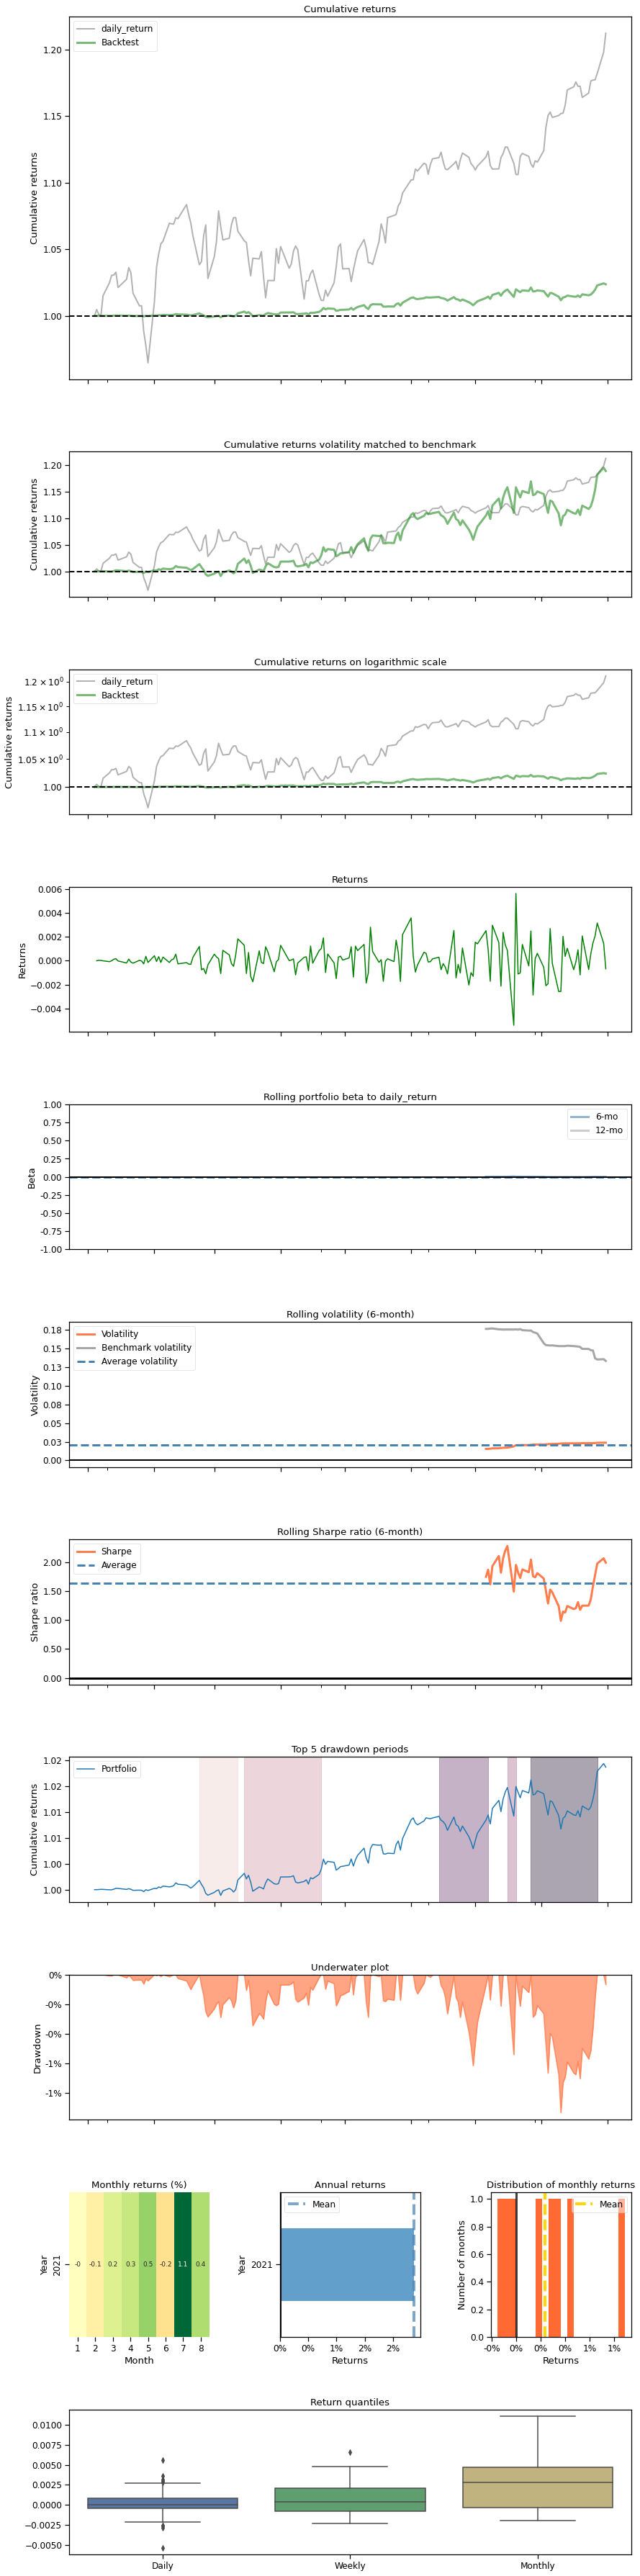

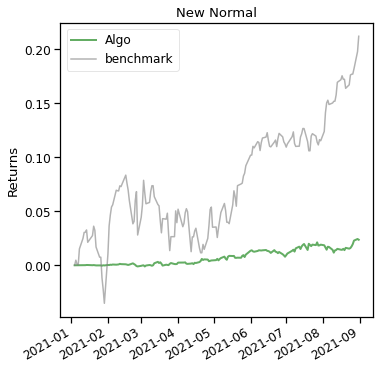

In [ ]:
""" BackTest Plot """
# YOUR CODE HERE
%matplotlib inline
backtest_plot(account_value = df_account_value,     # pass the account value memory into the backtest functions
              baseline_ticker = '^NSEI',             # select a baseline ticker Dow Jones Index: ^DJI, S&P 500: ^GSPC, NASDAQ 100: ^NDX
              baseline_start = '2020-01-01', 
              baseline_end =  '2021-09-01')

### DashBoard (2 points)

Dash is a simple open source library. It is the original low-code framework for rapidly building data apps in Python, R, Julia, and F#. It can bind a user interface to Python code in less than 10 minutes.

Dash apps are rendered in the web browser. Since Dash apps are viewed in the web browser, Dash is inherently cross-platform and mobile ready.

Dash is released under the permissive MIT license. Plotly develops Dash and also offers a platform for writing and deploying Dash apps.

Refer to Dash Documentation [here](https://dash.plotly.com/). Mainly refer to Part 2 (Layout) and Part 3 (Basic callbacks) within the Dash tutorial in the given documentation. 

To know more about Dash, refer [here](https://medium.com/plotly/introducing-jupyterdash-811f1f57c02e).



#### Create the dashboard using Dash HTML components

Hint: [Layout](https://dash.plotly.com/layout) , [callbacks](https://dash.plotly.com/basic-callbacks)

* Scatter plot of Stock closing price 
  * Create a dropdown for ticker Symbols
  * Create a plot of stock closing price values that changes upon selecting ticker using drop down
* Bar plot of trade off balance resulted from DRL Agent 
  * Create two dropdowns for selecting start and end dates
  * Create a bar plot showing account value between start and end date as a result to dropdown change.


In [ ]:
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output,State

In [ ]:
df = px.data.stocks()

In [ ]:
df.columns

Index(['date', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'], dtype='object')

In [ ]:
df.head()
df.set_index('date', inplace=True)

In [136]:
from jupyter_dash import JupyterDash
from dash import html, dcc
import plotly.graph_objects as go # or plotly.express as px

app = JupyterDash()
app.layout = html.Div([
    html.H4('Stock price analysis'),
    dcc.Graph(id="time-series-chart"),
    html.P("Select stock:"),
    dcc.Dropdown(
        id="ticker",
        value='AMZN',
        options=[{'label': i, 'value': i} for i in df.columns],
        clearable=False,
    ),
])


@app.callback(
    Output("time-series-chart", "figure"), 
    Input("ticker", "value"))
def display_time_series(ticker):
    df = px.data.stocks() # replace with your own data source
    fig = px.line(df, x='date', y=ticker)
    return fig

app.run_server(mode='external', port=8060)

Dash app running on:


<IPython.core.display.Javascript object>

In [ ]:
import plotly.express as px
import pandas as pd
#df = px.data.stocks(indexed=True)
df = px.data.stocks()
df['date'].head()
start_date='2018-01-1'
end_date='2018-03-31'
ticker = 'GOOG'
mask = (df.date > start_date) & (df.date <= end_date)
df = df.loc[mask,]
df = df.set_index('date')
fig = px.bar(df, x=df.index, y=df[ticker])
fig.show()

In [130]:
import plotly.express as px
import pandas as pd
#df = px.data.stocks(indexed=True)
# df = px.data.stocks()
# df['date'].head()
# start_date='2018-01-1'
# end_date='2018-03-31'
# ticker = 'GOOG'
# mask = (df.date > start_date) & (df.date <= end_date)
# df = df.loc[mask,]
# df = df.set_index('date')
# fig = px.bar(df, x=df.index, y=df[ticker])
# fig.show()
  #  if start_date_value is not None:
  #       date_object = date.fromisoformat(start_date_value)
  #       start_date_string = date_object.strftime('%Y %m, %d')
  #   if end_date_value is not None:
  #       date_object = date.fromisoformat(end_date_value)
  #       end_date_string = date_object.strftime('%Y %m, %d')
mask = (df_account_value['date'] > '2019-1-1') & (df_account_value['date'] <= '2020-3-31')
df_slice = df_account_value.loc[mask,['date','account_value']]
df = df_slice.set_index('date')
#fig = px.bar(df_slice, x="Date", y="Value",barmode="group")
fig = px.bar(df, x=df.index, y=df['account_value'])
fig.show()

NameError: ignored

In [ ]:
from datetime import date
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
import plotly.graph_objects as go # or plotly.express as px

app = JupyterDash()
app.layout = html.Div([
    dcc.Graph(id="time-series-barchart"),                  
    dcc.DatePickerRange(
        id='my-date-picker-range',
        min_date_allowed=date(2022, 1, 1),
        max_date_allowed=date(2022, 3, 31),
        initial_visible_month=date(2022, 1, 1),
        end_date=date(2022, 3, 31)
    ),
    html.Div(id='output-container-date-picker-range'),
    dcc.Graph(id="time-seriesbarchart")
])
@app.callback(
    Output('output-container-date-picker-range', 'children'),
    Input('my-date-picker-range', 'start_date'),
    Input('my-date-picker-range', 'end_date'))
def update_output(start_date, end_date):
    string_prefix = 'You have selected: '
    if start_date is not None:
        start_date_object = date.fromisoformat(start_date)
        start_date_string = start_date_object.strftime('%B %d, %Y')
        string_prefix = string_prefix + 'Start Date: ' + start_date_string + ' | '
    if end_date is not None:
        end_date_object = date.fromisoformat(end_date)
        end_date_string = end_date_object.strftime('%B %d, %Y')
        string_prefix = string_prefix + 'End Date: ' + end_date_string
    if len(string_prefix) == len('You have selected: '):
        return 'Select a date to see it displayed here'
    else:
        return string_prefix
@app.callback(
    Output("time-series-barchart", "figure"), 
    Input('my-date-picker-range', 'start_date'),
    Input('my-date-picker-range', 'end_date'))
def display_time_series(start_date, end_date):
    df = px.data.stocks()
    df = df.loc[df.date >=start_date & df.date<=end_date, ]
    df = df.set_index('date')
    fig = px.bar(df, x=df.index, y=df['GOOG'])
    return fig

app.run_server(mode='external', port=8060)

Dash app running on:


<IPython.core.display.Javascript object>

In [128]:
from datetime import date
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
import plotly.graph_objects as go # or plotly.express as px
app = JupyterDash()
app.layout = html.Div([
    html.H1("Stock Price - NIFTY50"),
    dcc.DatePickerSingle(
        id='start-date-picker',
        min_date_allowed=date(2009, 1, 1),
        max_date_allowed=date(2021, 9, 1),
        initial_visible_month=date(2009, 1, 1),
        date=date(2009, 1, 1)
    ),
    html.Div(id='start-date-output'),
    dcc.DatePickerSingle(
        id='end-date-picker',
        min_date_allowed=date(2009, 1, 1),
        max_date_allowed=date(2021, 9, 1),
        initial_visible_month=date(2021, 9, 1),
        date=date(2021, 9, 1)
    ),
    html.Div(id='end-date-output'),
    dcc.Graph(id='bar-graphic'),
])
@app.callback(
    Output('bar-graphic', 'figure'),
    Input('start-date-picker', 'date'),
    Input('end-date-picker', 'date'))
def update_graph(start_date_value, end_date_value):
    if start_date_value is not None:
        date_object = date.fromisoformat(start_date_value)
        start_date_string = date_object.strftime('%Y %m, %d')
    if end_date_value is not None:
        date_object = date.fromisoformat(end_date_value)
        end_date_string = date_object.strftime('%Y %m, %d')
    mask = (df_account_value['date'] > '2019-1-1') & (df_account_value['date'] <= '2020-3-31')
    df_slice = df_account_value.loc[mask]['account_value']
    #fig = px.bar(df_slice, x="Date", y="Value",barmode="group")
    fig = px.bar(df, x=df.index, y=df[ticker])
    return fig
app.run_server(mode='external', port=8060)

Dash app running on:


<IPython.core.display.Javascript object>

In [ ]:
app._terminate_server_for_port("localhost", 8060) 

### Report Analysis

* Discuss on the parameters used to increase the reward
* Report the safest stocks to trade without much loss
* Comment on the Dashboard application and user interface
